# Make a bunch of logos

Try a couple of sizes
- 14 by 14 
- 30 by 30

In [401]:
import numpy as np
import pandas as pd
import requests as re
from PIL import Image
from scipy.ndimage import convolve
from io import BytesIO

import os
import time
from RGBMatrixEmulator import RGBMatrix, RGBMatrixOptions

In [374]:
mlb_logos = pd.read_csv("MLB_Colors_Logos.csv")

In [375]:
mlb_logos

,team_name,team_location,team_mascot,team_abbr,team_id_num,team_logo_espn,team_scoreboard_logo_espn,team_cap_logo_on_light,team_cap_logo_on_dark,team_color,team_color2,team_color3,team_color4,team_color5,team_league,team_division,team_division_location,team_league_logo,mlb_logo
0,Arizona Diamondbacks,Arizona,Diamondbacks,AZ,109.0,https://a.espncdn.com/i/teamlogos/mlb/500/ari.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#A71930,#E3D4AD,#000000,#30CED8,#FFFFFF,NL,NL West,West,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
1,Atlanta Braves,Atlanta,Braves,ATL,144.0,https://a.espncdn.com/i/teamlogos/mlb/500/atl.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#CE1141,#13274F,#EAAA00,#FFFFFF,NaN,NL,NL East,East,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
2,Baltimore Orioles,Baltimore,Orioles,BAL,110.0,https://a.espncdn.com/i/teamlogos/mlb/500/bal.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#DF4601,#000000,NaN,NaN,NaN,AL,AL East,East,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
3,Boston Red Sox,Boston,Red Sox,BOS,111.0,https://a.espncdn.com/i/teamlogos/mlb/500/bos.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#BD3039,#0C2340,#FFFFFF,NaN,NaN,AL,AL East,East,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
4,Chicago Cubs,Chicago,Cubs,CHC,112.0,https://a.espncdn.com/i/teamlogos/mlb/500/chc.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#0E3386,#CC3433,NaN,NaN,NaN,NL,NL Central,Central,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
5,Chicago White Sox,Chicago,White Sox,CWS,145.0,https://a.espncdn.com/i/teamlogos/mlb/500/cws.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#27251F,#C4CED4,NaN,NaN,NaN,AL,AL Central,Central,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
6,Cincinnati Reds,Cincinnati,Reds,CIN,113.0,https://a.espncdn.com/i/teamlogos/mlb/500/cin.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#C6011F,#000000,NaN,NaN,NaN,NL,NL Central,Central,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
7,Cleveland Guardians,Cleveland,Guardians,CLE,114.0,https://a.espncdn.com/i/teamlogos/mlb/500/cle.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#0C2340,#E31937,NaN,NaN,NaN,AL,AL Central,Central,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
8,Colorado Rockies,Colorado,Rockies,COL,115.0,https://a.espncdn.com/i/teamlogos/mlb/500/col.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbstatic.com/team-logos/team-cap-...,https://www.mlbstatic.com/team-logos/team-cap-...,#33006F,#C4CED4,#000000,NaN,NaN,NL,NL West,West,https://a.espncdn.com/combiner/i?img=/i/teamlo...,https://a.espncdn.com/combiner/i?img=/i/teamlo...
9,Detroit Tigers,Detroit,Tigers,DET,116.0,https://a.espncdn.com/i/teamlogos/mlb/500/det.png,https://a.espncdn.com/i/teamlogos/mlb/500/scor...,https://www.mlbsta

In [376]:
mlb_logos.team_abbr.values

array(['AZ', 'ATL', 'BAL', 'BOS', 'CHC', 'CWS', 'CIN', 'CLE', 'COL',
       'DET', 'HOU', 'KC', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SD', 'SF', 'SEA', 'STL', 'TB', 'TEX',
       'TOR', 'WSH', 'NL', 'AL', 'MLB'], dtype=object)

In [392]:
base_img_url = mlb_logos.loc[mlb_logos["team_abbr"] == "MLB", "team_scoreboard_logo_espn"].values[0]


In [393]:
base_img_url

'https://a.espncdn.com/combiner/i?img=/i/teamlogos/leagues/500/mlb.png'

In [394]:
# IDK which size over here!
base_width= 14
img_resp = re.get(base_img_url)

img = Image.open(BytesIO(img_resp.content))

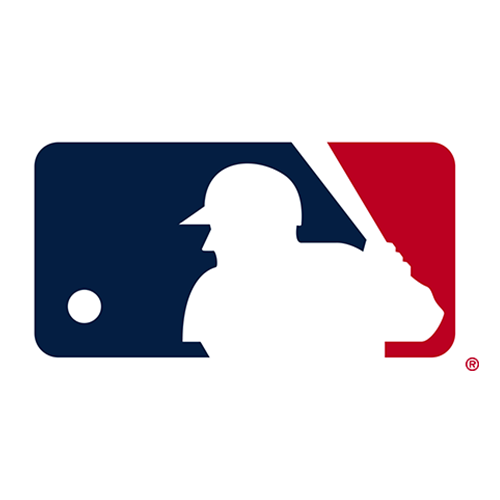

In [395]:
img

In [386]:
wpercent = (base_width / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
small_img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
#img.save('somepic.jpg')

In [387]:
small_img

In [388]:
img_as_array = np.array(small_img.convert('RGB'))

In [389]:
Image.fromarray(img_as_array, 'RGB')

## Hmm I think I need to collapse the three channels

And I also need to do the max instead of a convolution?

In [390]:
def drop_pixels(image, num_neighbors):
    image_copy = np.copy(image)
    print(np.sum(image_copy), image_copy.shape)
    
    non_zero_pixels = np.where(np.sum(image_copy, axis=2) > 0, 1, 0)
    
    # count the number of adjacent pixels
    neighborhood_filter = np.array([[0, 1, 0],
                                    [1, 0, 1],
                                    [0, 1, 0]])

    neighbors_count = convolve(non_zero_pixels, neighborhood_filter, mode='constant', cval=0.0)
    
    mask = neighbors_count > num_neighbors

    print("how many pixel with more than {} neighbors".format(num_neighbors), np.sum(mask), mask.shape)
    
    image_copy[~mask, :] = 0

    print(np.sum(image_copy), img_as_array_copy.shape)
    
    return image_copy


In [391]:
Image.fromarray(drop_pixels(img_as_array, 2))

17950 (14, 14, 3)
how many pixel with more than 2 neighbors 79 (14, 14)
11456 (14, 14, 3)


In [396]:
Image.fromarray(drop_pixels(img_as_array, 2))

17950 (14, 14, 3)
how many pixel with more than 2 neighbors 79 (14, 14)
11456 (14, 14, 3)


In [ ]:
newImg1.save("img1.png","PNG")

In [402]:
file_path = "./assets/team_logos/"

for team_abbr in mlb_logos.team_abbr.values:
    print(team_abbr)
    
    os.makedirs(file_path + team_abbr +"/", exist_ok=True)
    
    base_img_url = mlb_logos.loc[mlb_logos["team_abbr"] == team_abbr, "team_scoreboard_logo_espn"].values[0]

    print(base_img_url)
    
    img_resp = re.get(base_img_url)
    img = Image.open(BytesIO(img_resp.content))
    
    # IDK which size over here!
    for base_width in [14, 30]:
        
        wpercent = (base_width / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        small_img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)

        img_as_array = np.array(small_img.convert('RGB'))

        for neighbors in [1, 2, 3]:
            cleaned_img = Image.fromarray(drop_pixels(img_as_array, neighbors))

            file_name = "{}-w{}n{}.png".format(team_abbr, base_width, neighbors)
            
            cleaned_img.save(file_path + team_abbr + "/" + file_name, "PNG")
    

AZ
https://a.espncdn.com/i/teamlogos/mlb/500/scoreboard/ari.png
38434 (14, 14, 3)
how many pixel with more than 1 neighbors 134 (14, 14)
35573 (14, 14, 3)
38434 (14, 14, 3)
how many pixel with more than 2 neighbors 108 (14, 14)
28571 (14, 14, 3)
38434 (14, 14, 3)
how many pixel with more than 3 neighbors 71 (14, 14)
16852 (14, 14, 3)
170758 (30, 30, 3)
how many pixel with more than 1 neighbors 533 (30, 30)
153119 (14, 14, 3)
170758 (30, 30, 3)
how many pixel with more than 2 neighbors 406 (30, 30)
122069 (14, 14, 3)
170758 (30, 30, 3)
how many pixel with more than 3 neighbors 308 (30, 30)
79642 (14, 14, 3)
ATL
https://a.espncdn.com/i/teamlogos/mlb/500/scoreboard/atl.png
24671 (14, 14, 3)
how many pixel with more than 1 neighbors 149 (14, 14)
23781 (14, 14, 3)
24671 (14, 14, 3)
how many pixel with more than 2 neighbors 117 (14, 14)
20530 (14, 14, 3)
24671 (14, 14, 3)
how many pixel with more than 3 neighbors 82 (14, 14)
15344 (14, 14, 3)
83003 (30, 30, 3)
how many pixel with more than 1